In [5]:
import pandas as pd

# Replace 'your_file_name.xlsx' with the actual file name
file_path = r'C:\\Users\\kushw\Downloads\Zepto_Data.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Display the first few rows
print(df.head())


   S.No       Date       Day      Time Photo/Video  Likes   Comment  \
0     1 2024-11-09  Saturday  18:28:00       Photo     188       29   
1     2 2024-11-08    Friday  17:01:00       Video     216       32   
2     3 2024-11-07  Thursday  12:01:00       Video     346       25   
3     4 2024-11-05   Tuesday  17:54:00       Video     450       70   
4     5 2024-11-04    Monday  17:59:00       Video     468       60   

  Collab Made / Not                                       Caption Used  
0                No  nothing, just helping you finalize your movie ...  
1                No  Tag your coffee 👀\n\n[Coffee, espresso, latte,...  
2               Yes  Looking sharp has never been this quick!✨\n\nP...  
3                No                            hecker hu bhai hecker 😎  
4                No         Tag your chai 👀\n\n[Chai, tea, chai tapri]  


In [6]:
print(df.tail())

    S.No       Date       Day      Time Photo/Video  Likes   Comment  \
95    96 2024-07-27  Saturday  11:14:00       Video     756       69   
96    97 2024-07-26    Friday  17:55:00       Photo     466       24   
97    98 2024-07-25  Thursday  17:51:00       Video    9441      148   
98    99 2024-07-23   Tuesday  13:47:00       Video    1045       64   
99   100 2024-07-22    Monday  18:56:00       Photo     818       24   

   Collab Made / Not                                       Caption Used  
95                No         who knew board meetings could lead to this  
96                No              just getting ready for the olympics 🏅  
97                No         Comment more underrated combos like these.  
98                No  Bank balance jitna bhi ho, masti nahi rukni ch...  
99                No  tag your bros and make a plan 😉\n\n( rain, cha...  


In [7]:
# Clean up column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Now, calculate the descriptive statistics for likes and comments
engagement_summary = df[['Likes', 'Comment']].describe()
engagement_summary

,Likes,Comment
count,100.000000,100.000000
mean,6081.090000,124.830000
std,20190.171702,302.447459
min,188.000000,14.000000
25%,457.000000,38.000000
50%,655.500000,56.000000
75%,1215.750000,95.500000
max,136000.000000,2670.000000


In [8]:
# Calculate average likes and comments for each post type (Photo or Video)
post_type_engagement = df.groupby('Photo/Video')[['Likes', 'Comment']].mean()
print(post_type_engagement)

                   Likes     Comment
Photo/Video                         
Photo        3825.692308   67.346154
Video        6873.527027  145.027027


In [9]:
# Calculate average engagement for collaborative vs. non-collaborative posts
collab_engagement = df.groupby('Collab Made / Not')[['Likes', 'Comment']].mean()
print(collab_engagement)

                        Likes   Comment
Collab Made / Not                      
No                  3466.7875  100.7875
Yes                16538.3000  221.0000


In [10]:
from collections import Counter
import re

# Combine all captions into a single text
all_captions = " ".join(df['Caption Used'].astype(str))

# Remove special characters and split words
words = re.findall(r'\b\w+\b', all_captions.lower())

# Count the most common words
word_counts = Counter(words)
print(word_counts.most_common(10))  # Display the top 10 words

[('to', 42), ('the', 30), ('your', 27), ('you', 24), ('and', 22), ('zepto', 20), ('in', 20), ('a', 19), ('10', 18), ('on', 17)]


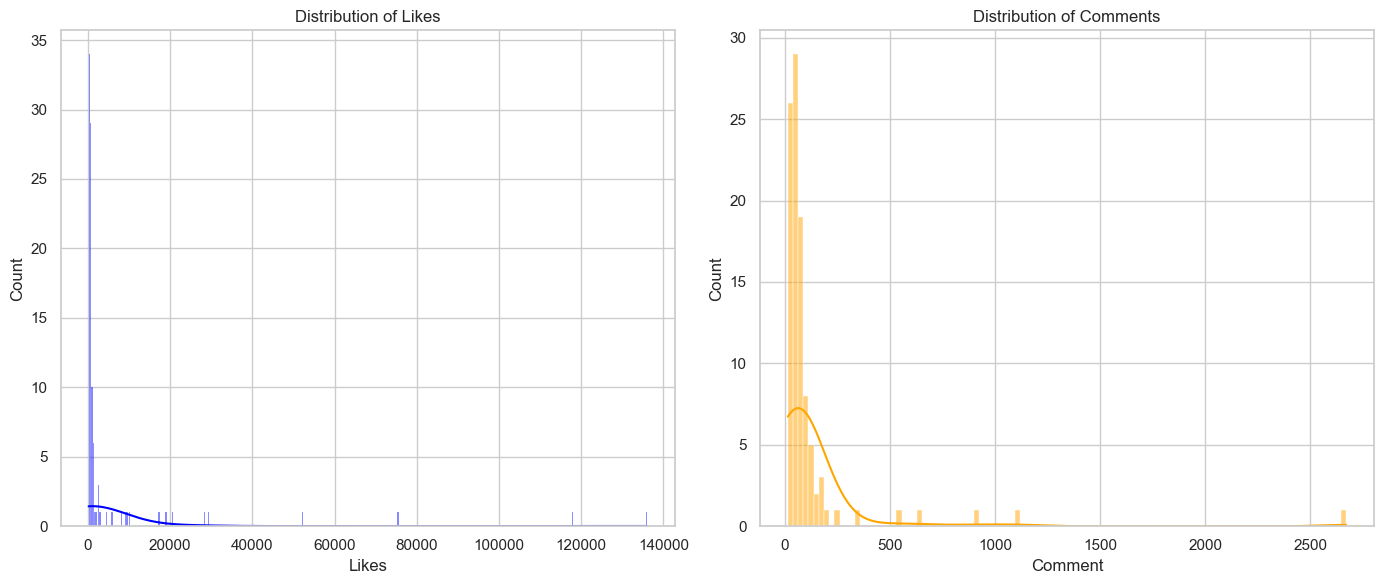

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# Plot histograms for Likes and Comments
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Likes'], kde=True, color='blue')
plt.title('Distribution of Likes')

plt.subplot(1, 2, 2)
sns.histplot(df['Comment'], kde=True, color='orange')
plt.title('Distribution of Comments')

plt.tight_layout()
plt.show()


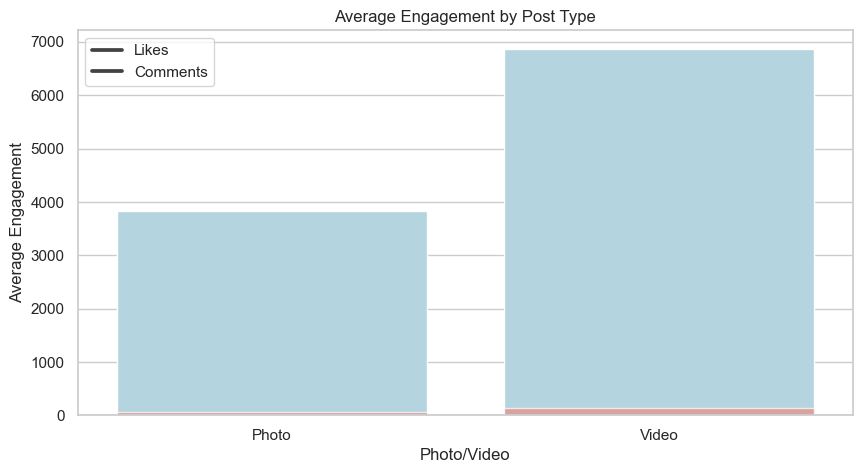

In [16]:
# Calculate average likes and comments for each post type
post_type_engagement = df.groupby('Photo/Video')[['Likes', 'Comment']].mean().reset_index()

# Plot engagement by post type
plt.figure(figsize=(10, 5))

# Plot Likes
sns.barplot(x='Photo/Video', y='Likes', data=post_type_engagement, color='lightblue')

# Plot Comments (with alpha blending)
sns.barplot(x='Photo/Video', y='Comment', data=post_type_engagement, color='salmon', alpha=0.7)

plt.title('Average Engagement by Post Type')
plt.ylabel('Average Engagement')
plt.legend(['Likes', 'Comments'])
plt.show()


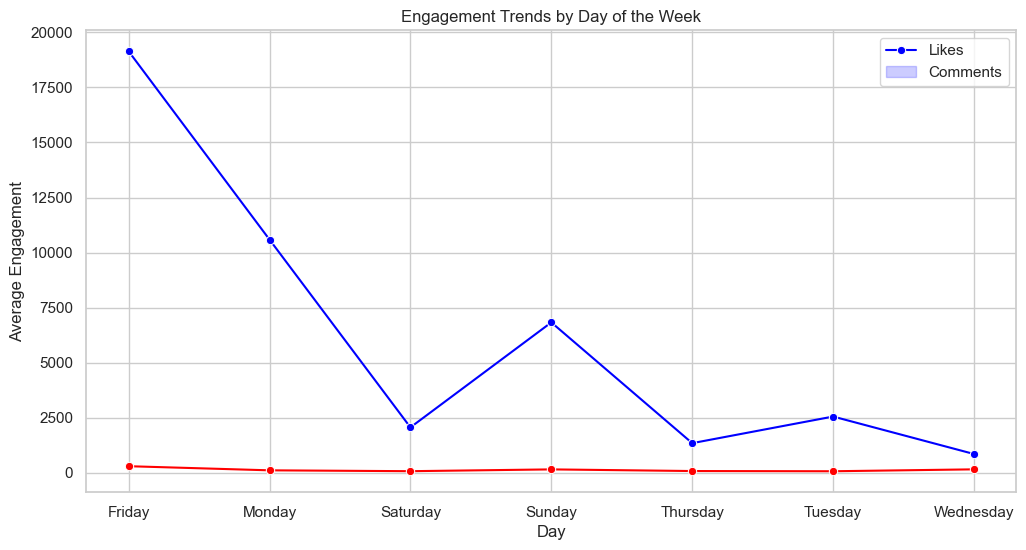

In [17]:
# Calculate average engagement by day
day_engagement = df.groupby('Day')[['Likes', 'Comment']].mean().reset_index()

# Plot engagement trends by day
plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='Likes', data=day_engagement, marker='o', color='blue')
sns.lineplot(x='Day', y='Comment', data=day_engagement, marker='o', color='red')
plt.title('Engagement Trends by Day of the Week')
plt.ylabel('Average Engagement')
plt.legend(['Likes', 'Comments'])
plt.show()

In [24]:
print(df.columns)

Index(['S.No', 'Date', 'Day', 'Time', 'Photo/Video', 'Likes', 'Comment',
       'Collab Made / Not', 'Caption Used'],
      dtype='object')


In [26]:
# Strip any extra whitespace from column names
df.columns = df.columns.str.strip()

# Verify the column names again
print(df.columns)

Index(['S.No', 'Date', 'Day', 'Time', 'Photo/Video', 'Likes', 'Comment',
       'Collab Made / Not', 'Caption Used'],
      dtype='object')


In [27]:
# Calculate Engagement Rate
df['Engagement_Rate'] = ((df['Likes'] + df['Comment']) / (df['Likes'].sum() + df['Comment'].sum())) * 100

# Display the result
print(df[['Likes', 'Comment', 'Engagement_Rate']].head())


   Likes  Comment  Engagement_Rate
0    188       29         0.034967
1    216       32         0.039962
2    346       25         0.059782
3    450       70         0.083791
4    468       60         0.085080


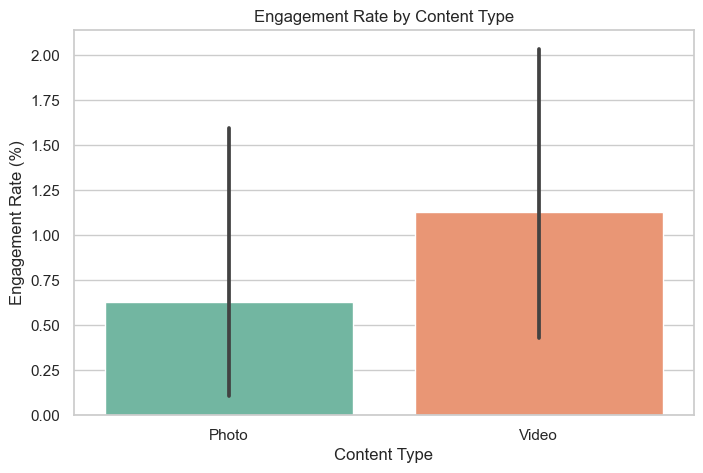

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot with 'df' as the DataFrame
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Photo/Video', y='Engagement_Rate', palette="Set2")
plt.title("Engagement Rate by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Engagement Rate (%)")
plt.show()


C:\Users\kushw\AppData\Local\Temp\ipykernel_7192\2384783646.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time'].astype(str), errors='coerce').dt.hour  # Convert Time to datetime and extract hour


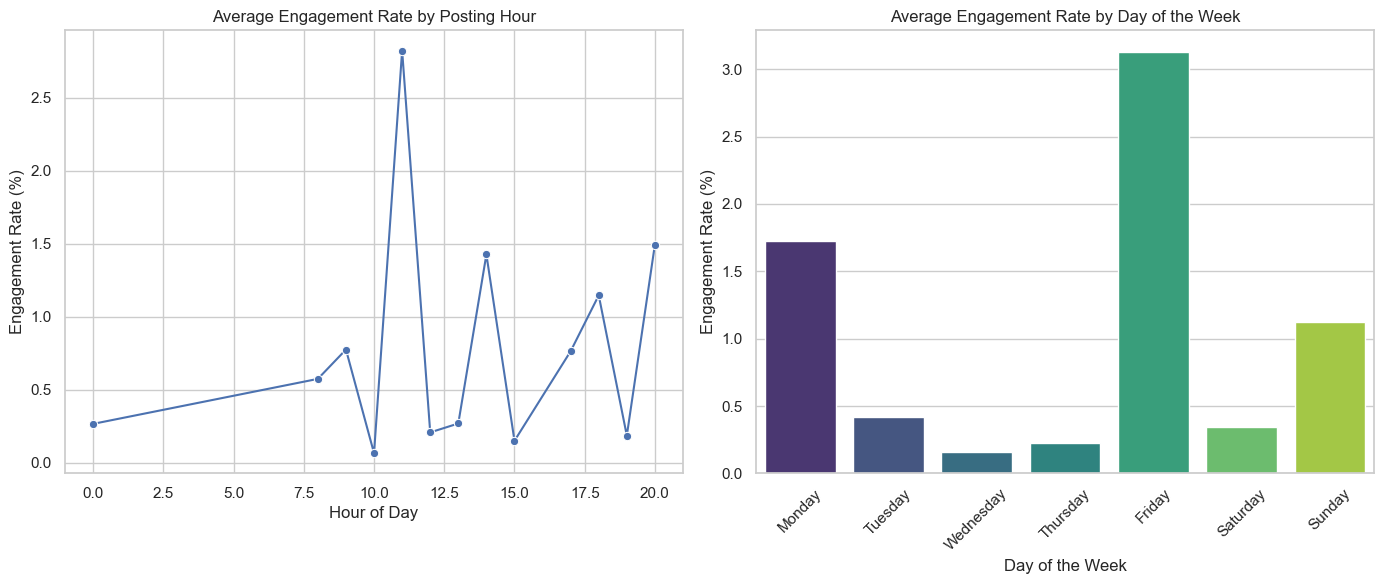

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame (You can skip this if you're already using df)
# df = pd.read_excel('your_file.xlsx')  # Ensure this line is already loading your DataFrame

# Ensure Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Convert 'Time' to datetime only if it's in the expected format ('%H:%M:%S')
# If there are issues, we'll use pd.to_datetime with 'errors' as 'coerce' to handle invalid time values
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Extract Hour and Day of the week from Date and Time
df['Hour'] = pd.to_datetime(df['Time'].astype(str), errors='coerce').dt.hour  # Convert Time to datetime and extract hour
df['Day'] = df['Date'].dt.day_name()  # Extract day name from Date column

# Calculate Engagement Rate if it's not already calculated
df['Engagement_Rate'] = ((df['Likes'] + df['Comment']) / (df['Likes'].sum() + df['Comment'].sum())) * 100

# Group by Hour and Day to calculate mean engagement rate
hour_engagement = df.groupby('Hour')['Engagement_Rate'].mean()
day_engagement = df.groupby('Day')['Engagement_Rate'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plotting
plt.figure(figsize=(14, 6))

# Hourly Engagement Rate Plot
plt.subplot(1, 2, 1)
sns.lineplot(x=hour_engagement.index, y=hour_engagement.values, marker='o')
plt.title("Average Engagement Rate by Posting Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Engagement Rate (%)")

# Daily Engagement Rate Plot
plt.subplot(1, 2, 2)
sns.barplot(x=day_engagement.index, y=day_engagement.values, palette="viridis")
plt.title("Average Engagement Rate by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Engagement Rate (%)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


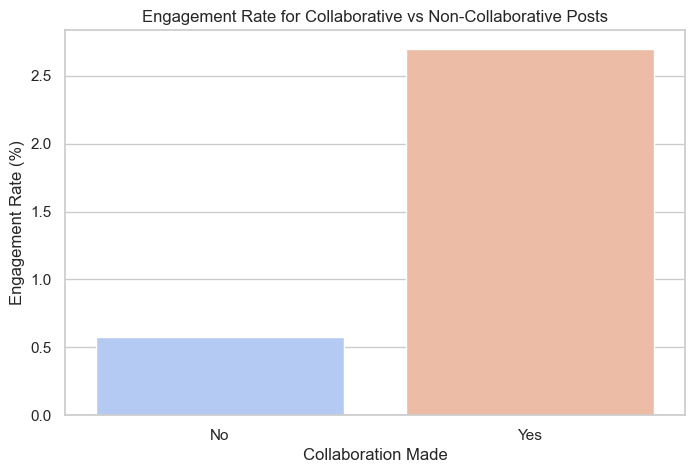

In [32]:
collab_engagement = df.groupby('Collab Made / Not')['Engagement_Rate'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=collab_engagement.index, y=collab_engagement.values, palette="coolwarm")
plt.title("Engagement Rate for Collaborative vs Non-Collaborative Posts")
plt.xlabel("Collaboration Made")
plt.ylabel("Engagement Rate (%)")
plt.show()

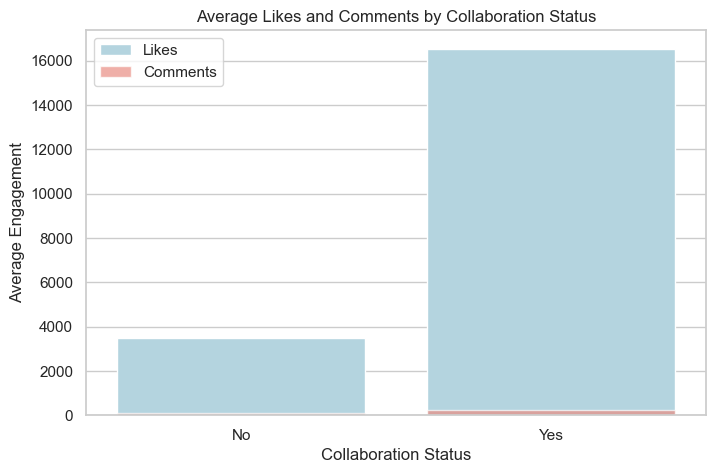

In [33]:
# Group by 'Collab Made / Not' to calculate average Likes and Comments
collab_engagement = df.groupby('Collab Made / Not')[['Likes', 'Comment']].mean()

# Plot average Likes and Comments by Collaboration
plt.figure(figsize=(8, 5))
sns.barplot(data=collab_engagement, x=collab_engagement.index, y='Likes', color='lightblue', label='Likes')
sns.barplot(data=collab_engagement, x=collab_engagement.index, y='Comment', color='salmon', alpha=0.7, label='Comments')
plt.title("Average Likes and Comments by Collaboration Status")
plt.xlabel("Collaboration Status")
plt.ylabel("Average Engagement")
plt.legend()
plt.show()


C:\Users\kushw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kushw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


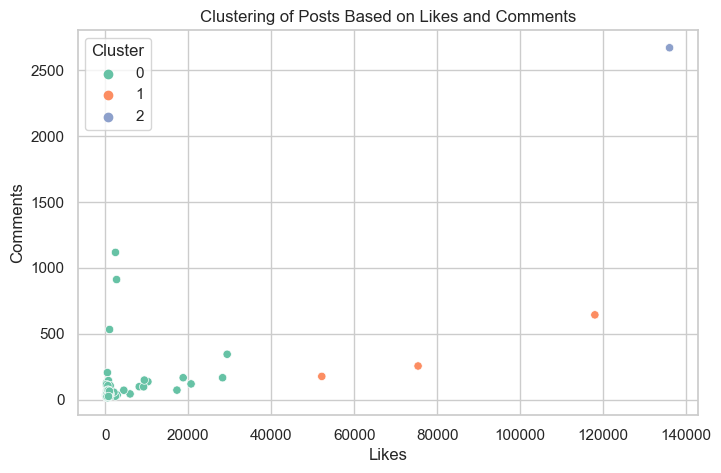

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Feature Engineering: Select relevant columns for clustering
clustering_data = df[['Likes', 'Comment', 'Engagement_Rate']]

# Normalize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Plot the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Likes', y='Comment', hue='Cluster', palette='Set2')
plt.title("Clustering of Posts Based on Likes and Comments")
plt.xlabel("Likes")
plt.ylabel("Comments")
plt.legend(title="Cluster")
plt.show()


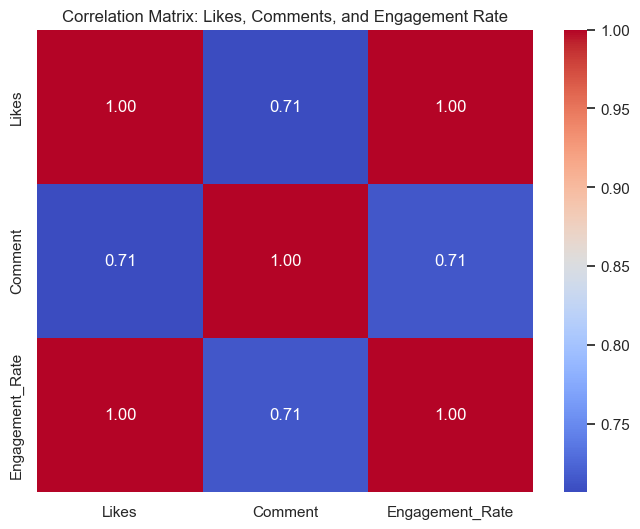

In [36]:
# Calculate correlation matrix
correlation_matrix = df[['Likes', 'Comment', 'Engagement_Rate']].corr()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix: Likes, Comments, and Engagement Rate")
plt.show()


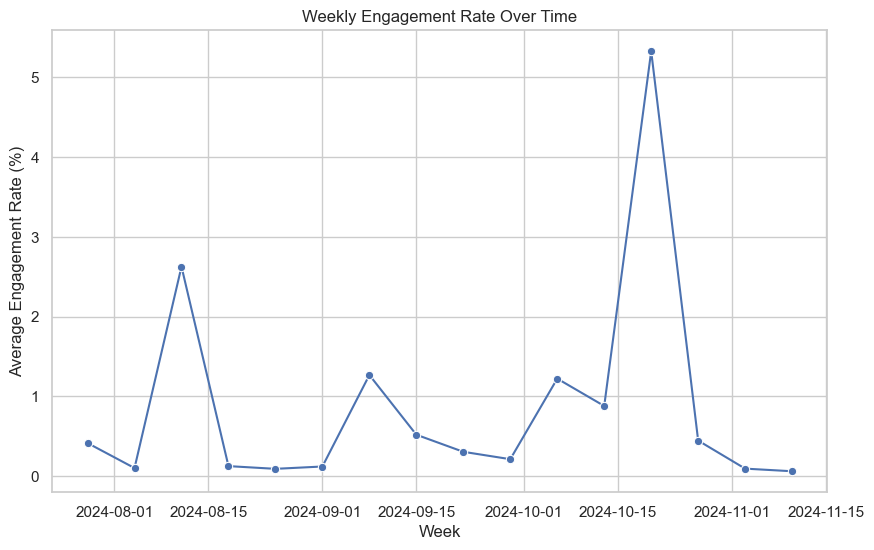

In [37]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)

# Resample the data to get weekly engagement
weekly_engagement = df.resample('W')['Engagement_Rate'].mean()

# Plot Time Series
plt.figure(figsize=(10, 6))
sns.lineplot(x=weekly_engagement.index, y=weekly_engagement.values, marker='o')
plt.title("Weekly Engagement Rate Over Time")
plt.xlabel("Week")
plt.ylabel("Average Engagement Rate (%)")
plt.show()


In [38]:
from scipy import stats

# Split the data into Photo and Video groups
photo_data = df[df['Photo/Video'] == 'Photo']
video_data = df[df['Photo/Video'] == 'Video']

# Perform a t-test to compare engagement rates between Photo and Video
t_stat, p_value = stats.ttest_ind(photo_data['Engagement_Rate'], video_data['Engagement_Rate'])

print(f'T-test Stat: {t_stat}, P-value: {p_value}')

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between Photo and Video engagement rates.")
else:
    print("There is no statistically significant difference between Photo and Video engagement rates.")


T-test Stat: -0.6699975954025571, P-value: 0.5044350067610763
There is no statistically significant difference between Photo and Video engagement rates.


In [40]:
# Check for missing or incorrect values in 'Time' column
df['Time'].isnull().sum()  # Check for null values
df['Time'].unique()  # Check for any irregular or incorrect values



array([18., 17., 12., 11.,  9., 19., 14., 20., nan, 15.,  0., 13., 10.,
        8.])

In [41]:
# Attempt to convert the 'Time' column to datetime with error handling
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour


In [43]:
# Ensure 'Time' is in string format
df['Time'] = df['Time'].astype(str)

# Remove rows where 'Time' doesn't match the expected format (HH:MM:SS)
df = df[df['Time'].str.match(r'^\d{2}:\d{2}:\d{2}$', na=False)]

# Now convert 'Time' to datetime and extract the hour
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour


In [44]:
# Ensure the 'Time' column is a string type
df['Time'] = df['Time'].astype(str)

# Convert the 'Time' column to datetime and extract the hour
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour


In [45]:
# Print first few rows of the 'Time' column to inspect the format
print(df['Time'].head())


Series([], Name: Time, dtype: int32)


In [49]:
# Check for any missing or malformed values
df['Time'].isnull().sum()  # Check for null values
df['Time'] = df['Time'].astype(str)  # Ensure it's a string

# Coerce errors into NaT and extract the hour
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour

# If there are rows with NaT after coercion, handle them (e.g., fill with a default value)
df['Time'].fillna(0, inplace=True)  # Fill NaT with 0 or another appropriate value

